In [1]:
import os
import numpy as np
from scipy.io.wavfile import read
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

In [23]:
def load_all_wavs(root_path):
    loaded_wavs = []
    rates = []
    for root, _, filenames in os.walk(root_path):
        for fname in filenames:
            file_path = os.path.join(root, fname)
            rate, data = read(file_path)
            loaded_wavs.append(data)
            rates.append(rate)

    return np.array(rates), np.array(loaded_wavs)

In [24]:
def load_dataset():
    dataset = {}
    jap_rates, jap_speakers = load_all_wavs('./ume-erj/wav/JE')
    eng_rates, eng_speakers = load_all_wavs('./ume-erj/wav/AE')
    # Model speakers for validation
    mdl_rates, mdl_speakers = load_all_wavs('./ume-erj/wav/MDL')

    dataset["jap_rates"] = jap_rates
    dataset["jap_speakers"] = jap_speakers
    dataset["eng_rates"] = eng_rates
    dataset["eng_speakers"] = eng_speakers
    dataset["mdl_rates"] = eng_rates
    dataset["mdl_speakers"] = eng_speakers

    return dataset

In [42]:
def audio_to_spectrogram(rates, data):
    #assert(rates.shape[0] == data.shape[0])
    result = []
    for rate, wav in zip(rates, data):
        f, t, Sxx = spectrogram(wav, 1/rate)
        result.append((f, t, Sxx ))
    return result

In [26]:
# this can take a while
dataset = load_dataset()

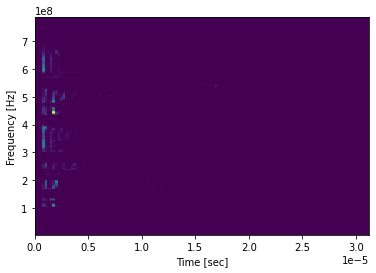

In [44]:
# convert japanese speakers wav files to spectrograms
jap_rates = dataset["jap_rates"]
jap_speakers = dataset["jap_speakers"]
# convert audio to spectrogram
f, t, Sxx = audio_to_spectrogram(np.array([jap_rates[0]]), [jap_speakers[0]])[0]
# visualize example
plt.pcolormesh(f, t, Sxx.T)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
